Invoke-WebRequest -Uri "https://www.scss.tcd.ie/Doug.Leith/CSU44061/week3.php" -OutFile "week3.csv"

# id:14--14--14

import relevant library

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

data preprocessing

In [4]:
data = np.loadtxt('week3.csv', delimiter=',')
# First two features
X = data[:, :2]

# Target (third column)
y = data[:, 2] 

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Question (i)a

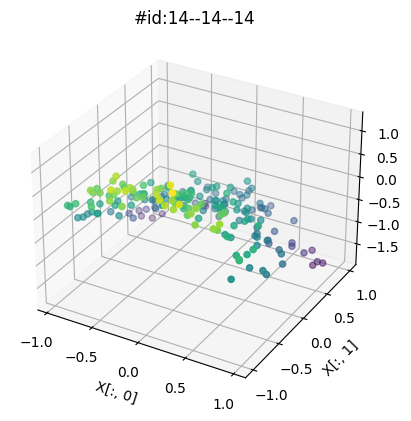

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='viridis', marker='o')
ax.set_xlabel('X[:, 0]')
ax.set_ylabel('X[:, 1]')
ax.set_title('#id:14--14--14')
plt.show()

1. x and y axis shows the different features 1 and 2, and the z-axis shows the output results. 
2. It can be seen that the data are all lying on a curve but not a plane.

Question i(b)

alpha = 1/(2 * c)
in Lasso regression model with polynomial features,
when c_val < 1 
all coefficients are 0
when c_val > 1
the standard deviation of the coefficients will increase gradually
Hence the C_values are set to 1,10,100,1000

In [12]:
def lasso_regression_model(x, y, model_name, degree_poly, test_c_vals):
    poly = PolynomialFeatures(degree_poly)
    x_poly = poly.fit_transform(x)

    results_dfs = []

    for c in test_c_vals:
        if model_name == 'Lasso':
            model = Lasso(alpha=1 / (2 * c), max_iter=10000)
        elif model_name == 'Ridge':
            model = Ridge(alpha=1 / (2 * c))

        model.fit(x_poly, y)

        result_dict = {
            'C_value': c,
            'coefficient': np.around(model.coef_, decimals=2),
            'intercept': model.intercept_
        }

        results_dfs.append(pd.DataFrame([result_dict]))

    model_results = pd.concat(results_dfs, ignore_index=True)
    return model_results

C_values = [1, 10, 100, 1000]
max_degree = 4
model_name = 'Lasso'

for degree_poly in range(max_degree + 1):
    print(f'\nPolynomial feature = {degree_poly}')
    result = lasso_regression_model(X, y, model_name, degree_poly, C_values)
    with pd.option_context('display.max_colwidth', 400):
        display(result)



Polynomial feature = 0


,C_value,coefficient,intercept
0,1,[0.0],-0.232525
1,10,[0.0],-0.232525
2,100,[0.0],-0.232525
3,1000,[0.0],-0.232525



Polynomial feature = 1


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0]",-0.232525
1,10,"[0.0, 0.0, -0.82]",-0.273121
2,100,"[0.0, 0.0, -0.95]",-0.279489
3,1000,"[0.0, 0.02, -0.96]",-0.279513



Polynomial feature = 2


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, -0.0, 0.0, 0.0]",-0.232525
1,10,"[0.0, 0.0, -0.84, -0.34, 0.0, 0.0]",-0.176237
2,100,"[0.0, 0.0, -1.0, -0.94, -0.0, 0.0]",-0.014443
3,1000,"[0.0, 0.0, -1.02, -1.01, -0.04, 0.04]",-0.011309



Polynomial feature = 3


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0]",-0.232525
1,10,"[0.0, 0.0, -0.84, -0.34, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0]",-0.176237
2,100,"[0.0, 0.0, -1.0, -0.94, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0]",-0.014443
3,1000,"[0.0, 0.0, -1.01, -1.01, -0.04, 0.04, 0.0, -0.0, 0.0, -0.0]",-0.011261



Polynomial feature = 4


,C_value,coefficient,intercept
0,1,"[0.0, 0.0, -0.0, -0.0, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0]",-0.232525
1,10,"[0.0, 0.0, -0.84, -0.34, 0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 0.0, 0.0]",-0.176237
2,100,"[0.0, 0.0, -1.0, -0.94, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0, 0.0]",-0.014443
3,1000,"[0.0, 0.0, -1.01, -1.01, -0.01, 0.04, -0.0, -0.0, 0.0, 0.0, -0.0, -0.05, -0.0, 0.0, -0.0]",-0.011343


C=1: y = -0.232525

C=10: y = -0.84 * x3 - 0.34 * x4 - 0.176237

C=100: y = -1.0 * x3 - 0.94 * x4 -0.014443

C=1000: y = -1.01 * x3 - 1.01 * x4 - 0.01 * x5 + 0.04 * x6 - 0.05 * x12 -     0.011343 

As c increaces, the value of alpha decreases and the penalty on the features decreases: when c is small, the penalty is large and may causing coefficients to become 0 and introduces data corruption.
Features will appear when c value increases
1. Low C: Simpler model with fewer or zero non-zero coefficients.
2. High C: More complex model with many non-zero coefficients, but may overfit if C is too large.

Question i(c)

lasso regression model was displayed using pipeline and polynomialfeatures

As the value of c increases, the lasso prediction becomes increasingly curved, which fits more data points and hence reach higher prediction accuracy

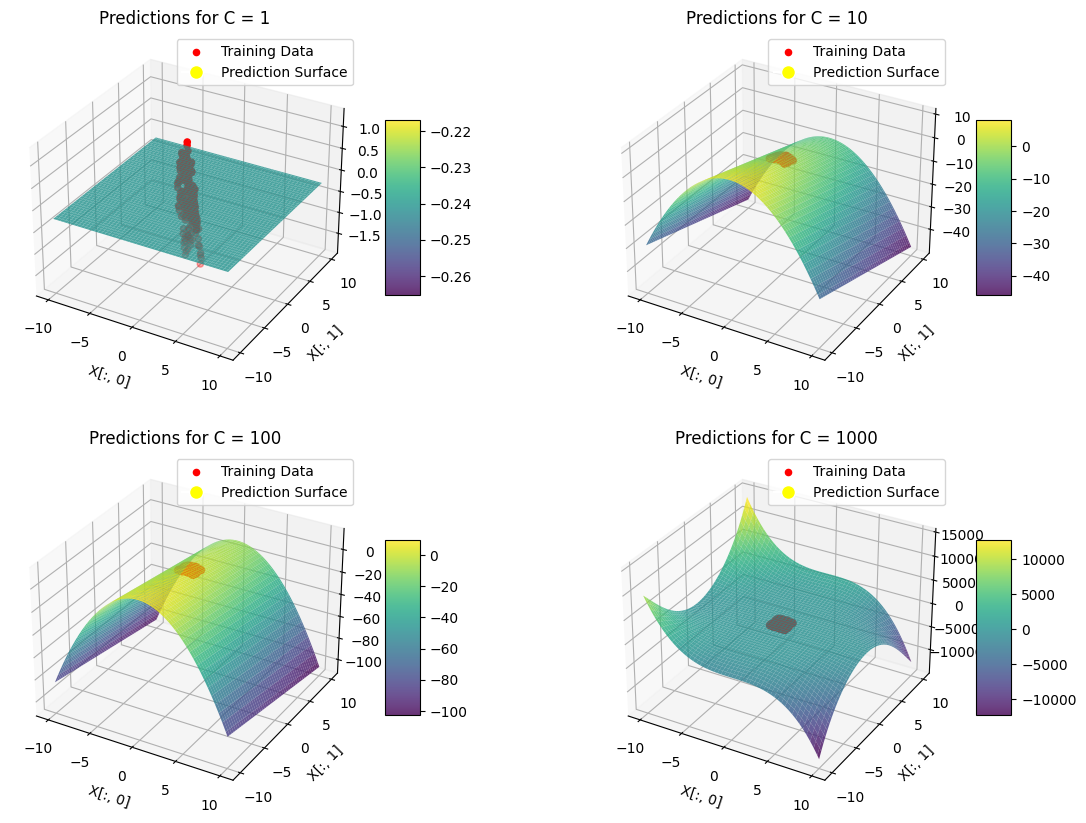

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from mpl_toolkits.mplot3d import Axes3D

def lasso_regression_model_cont(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Lasso(alpha=alpha, max_iter=10000))
    ])

# Define the models for different values of C
model_list = [lasso_regression_model_cont(5, 1/(2*c)).fit(x_train, y_train) for c in C_values]

# Set up the grid for predictions, extending beyond the data range
grid_range = np.linspace(-10, 10, 100)
X1_grid, X2_grid = np.meshgrid(grid_range, grid_range)
# Flatten the grid to pass into the model for prediction
grid_points = np.column_stack([X1_grid.ravel(), X2_grid.ravel()])

fig = plt.figure(figsize=(14, 10))

surface_proxy = Line2D([0], [0], marker='o', color='w', markerfacecolor='yellow', markersize=10, label='Prediction Surface')

for i, model in enumerate(model_list):
    axis = fig.add_subplot(2, 2, i + 1, projection='3d')
    scatter = axis.scatter(X[:, 0], X[:, 1], y, c='red', label='Training Data', s=20)
    Z = model.predict(grid_points).reshape(X1_grid.shape)
    surf = axis.plot_surface(X1_grid, X2_grid, Z, cmap='viridis', alpha=0.8)
    axis.set_title(f"Predictions for C = {C_values[i]}")
    axis.set_xlabel('X[:, 0]')
    axis.set_ylabel('X[:, 1]')
    axis.legend(handles=[scatter, surface_proxy])
    fig.colorbar(surf, ax=axis, shrink=0.5, aspect=5)

plt.show()


1. Small C Values: The predicted surface is flatter and simpler. The model tends to underfit the data, as it penalizes large coefficients, causing many of them to become zero, which fails to capture the complexity.
2. Large C Values: The model fits the training data more closely, resulting in a surface that can capture the data with more detail. However, as C becomes too large (C = 1000), the model start to overfit, capturing noise in the training data


Question i(d)

Underfitting occurs when a model is too simple and fails to capture the data's underlying patterns. It results in poor performance on both training and test data.

Overfitting happens when a model is too complex and fits the training data too closely, including noise. While it performs well on training data, it struggles with new, unseen data.

in question b and c, it can be conclude that when the c value is too large or too small, the result will brings either less or more penalty, and then the model will be over fittd or under fitted due to excessive consideration.

The key is to strike a balance, choosing a model of appropriate complexity, using techniques like cross-validation, regularization, and feature selection to prevent underfitting or overfitting and achieve better generalization.

The best trade off between over-fitting and under-fitting is achieved when C values range between 10 to 100, as result displays.

Question i(e)

In [71]:
def ridge_regression_model(x, y, degree_poly, test_C_values):
    x_poly = PolynomialFeatures(degree_poly).fit_transform(x)
    results_dfs = []

    for C in test_C_values:
        model = Ridge(alpha=1 / (2 * C))

        model.fit(x_poly, y)

        result_dict = {
            'C_value': C,
            'coefficient': np.around(model.coef_, decimals=2),
            'intercept': model.intercept_
        }

        results_dfs.append(pd.DataFrame([result_dict]))

    model_results = pd.concat(results_dfs, ignore_index=True)
    return model_results

C_values = [0.1, 1, 10, 100]
model_name = 'Ridge'

for degree_poly in range(len(C_values)):
    result = ridge_regression_model(X, y, degree_poly, C_values)
    with pd.option_context('display.max_colwidth', 400):
        print(f'Parameters for degree of polynomial feature = {degree_poly}')
        display(result)


Parameters for degree of polynomial feature = 0


,C_value,coefficient,intercept
0,0.1,[0.0],0.320287
1,1.0,[0.0],0.320287
2,10.0,[0.0],0.320287
3,100.0,[0.0],0.320287


Parameters for degree of polynomial feature = 1


,C_value,coefficient,intercept
0,0.1,"[0.0, 0.03, -0.9]",0.313001
1,1.0,"[0.0, 0.02, -0.96]",0.312625
2,10.0,"[0.0, 0.02, -0.97]",0.312585
3,100.0,"[0.0, 0.02, -0.97]",0.312581


Parameters for degree of polynomial feature = 2


,C_value,coefficient,intercept
0,0.1,"[0.0, 0.02, -0.93, 0.71, -0.01, -0.11]",0.119773
1,1.0,"[0.0, 0.01, -1.0, 0.89, 0.0, -0.11]",0.063577
2,10.0,"[0.0, 0.01, -1.0, 0.91, 0.0, -0.11]",0.056102
3,100.0,"[0.0, 0.01, -1.0, 0.91, 0.0, -0.11]",0.055329


Parameters for degree of polynomial feature = 3


,C_value,coefficient,intercept
0,0.1,"[0.0, 0.02, -0.73, 0.71, -0.0, -0.1, -0.02, -0.08, 0.0, -0.32]",0.116980
1,1.0,"[0.0, 0.03, -0.88, 0.89, 0.01, -0.1, -0.02, 0.02, -0.02, -0.21]",0.060862
2,10.0,"[0.0, 0.03, -0.91, 0.91, 0.01, -0.1, -0.02, 0.04, -0.03, -0.18]",0.053680
3,100.0,"[0.0, 0.03, -0.91, 0.91, 0.01, -0.1, -0.02, 0.04, -0.03, -0.17]",0.052947


C = 0.1: 0.02 * x2 - 0.73 * x3 + 0.71 * x4 - 0.10 * x6 - 0.02 * x7 - 0.08 * x8 - 0.32 * x10

C = 1.0: 0.03 * x2 - 0.88 * x3 + 0.89 * x4 + 0.01 * x5 - 0.10 * x6 - 0.02 * x7 + 0.02 * x8 - 0.02 * x9 - 0.21 * x10

C = 10.0 : 0.03 * x2 - 0.91 * x3 + 0.91 * x4 + 0.01 * x5 - 0.10 * x6 - 0.02 * x7 + 0.04 * x8 - 0.03 * x9 - 0.18 * x10

C = 100.0: 0.03 * x2 - 0.91 * x3 + 0.91 * x4 + 0.01 * x5 - 0.10 * x6 - 0.02 * x7 + 0.04 * x8 - 0.03 * x9 - 0.17 * x10

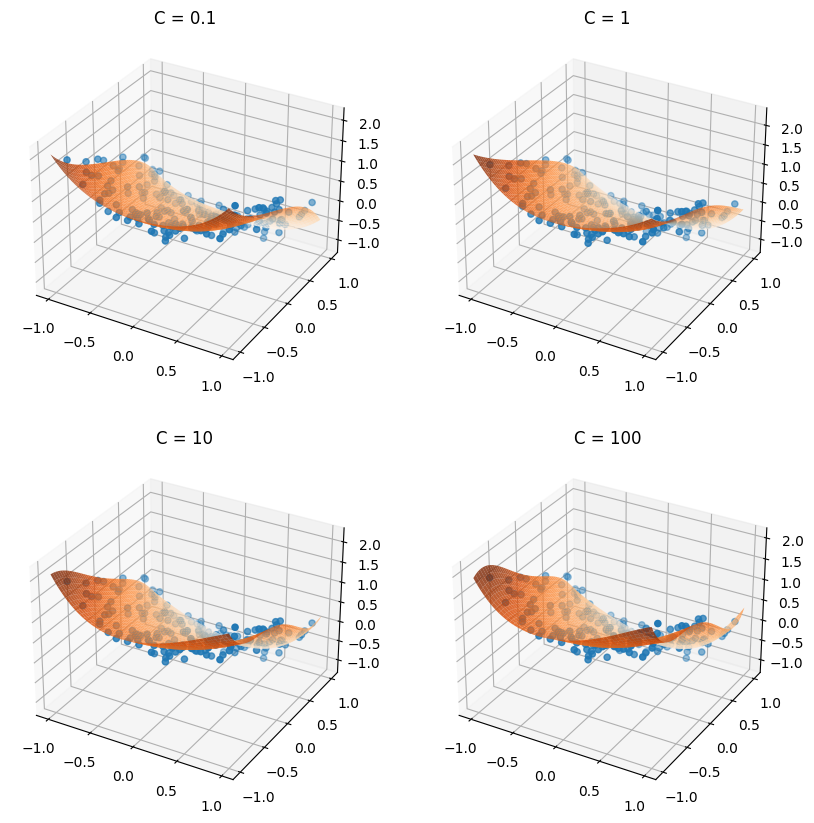

In [72]:
def ridge_regression(degree, alpha):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('reg', Ridge(alpha=alpha))
    ])

ridge_model_list = [ridge_regression(5, 1/(2*c)).fit(x_train, y_train) for c in C_values]

fig = plt.figure(figsize=(10, 10))

x1 = np.linspace(X[:, 0].min(), X[:, 0].max())
x2 = np.linspace(X[:, 1].min(), X[:, 1].max())
X1, X2 = np.meshgrid(x1, x2)

for i, (model, c) in enumerate(zip(ridge_model_list, C_values), start=1):
    ax = fig.add_subplot(2, 2, i, projection='3d')

    ax.scatter(X_0, X_1, X_2)

    Z = model.predict(np.column_stack((X1.ravel(), X2.ravel()))).reshape(X1.shape)

    surf = ax.plot_surface(X1, X2, Z, cmap='Oranges', alpha=0.8)
    plt.title("C = {}".format(c))

plt.show()


We can observe the conclusion from equations and 3D plots that altering c value doesn't change much towards the result
In addition, same c values doesn't provide similar output when using two differnt model:

As c increases in Ridge regression, the regularization strength increases, which means the coefficients of the features are pushed towards zero, but they are never exactly zero. This helps prevent overfitting and reduces the impact of multicollinearity

As c increases in Lasso regression, some feature coefficients may become exactly zero, effectively eliminating those features from the model. This can be useful for feature selection and model simplification.

Question ii(a)

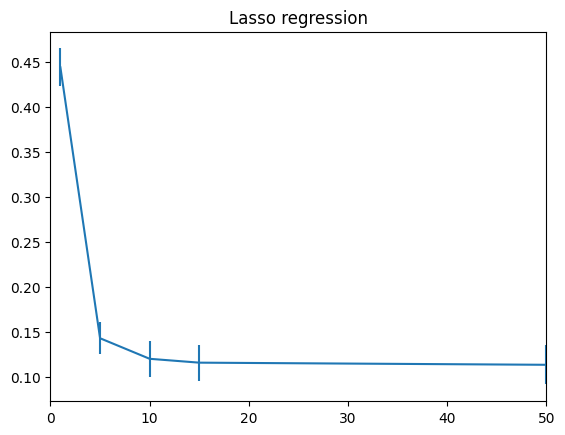

In [76]:
def five_fold_cross_validation(X_val, Y_val, C):
    mean_error = []
    std_error = []
    
    for c in C:
        model = Lasso(alpha=1/(2*c))
        
        mean_square_error = []
        Five_Fold = KFold(n_splits=5)
        
        for train, test in Five_Fold.split(X_val):
            model.fit(X_val[train], Y_val[train])
            predictions = model.predict(X_val[test])
            mean_square_error.append(mean_squared_error(Y_val[test], predictions))
        
        mean_error.append(np.mean(mean_square_error))
        std_error.append(np.std(mean_square_error))
    
    plt.errorbar(C, mean_error, yerr=std_error)
    plt.title('Lasso regression')
    plt.xlim((0, max(C)))
    plt.show()

C_values = [1, 5, 10, 15, 50]
five_fold_cross_validation(X, y, C_values)


It can be observe that the mean square error remains stable after the c value of 15, the mean square error drops significantly from the c value of 0 to 5

Question ii(b)

the value of Mean Square Error gradually stabilizes after C = 15, 
and the error between the results of the test set and the training set
is relatively small, representing a good reccomendation of the lasso model.

Question ii(c)

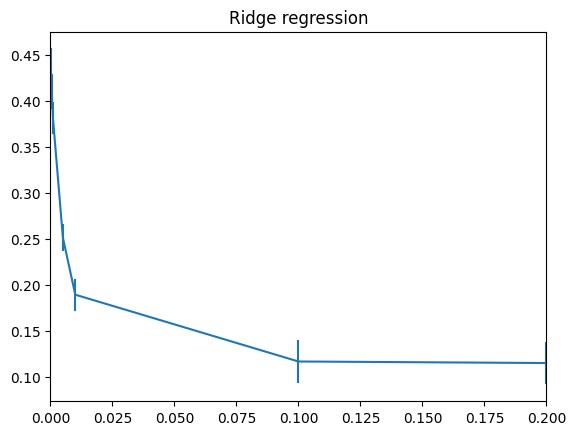

In [84]:
def five_fold_cross_validation(X_val, Y_val, C):
    mean_error = []
    std_error = []
    
    for c in C:
        model = Ridge(alpha=1/(2*c))
        
        mean_square_error = []
        Five_Fold = KFold(n_splits=5)
        
        for train, test in Five_Fold.split(X_val):
            model.fit(X_val[train], Y_val[train])
            predictions = model.predict(X_val[test])
            mean_square_error.append(mean_squared_error(Y_val[test], predictions))
        
        mean_error.append(np.mean(mean_square_error))
        std_error.append(np.std(mean_square_error))
    
    plt.errorbar(C, mean_error, yerr=std_error)
    plt.title('Ridge regression')
    plt.xlim((0, max(C)))
    plt.show()

C_values = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.2]
five_fold_cross_validation(X, y, C_values)


the value of Mean Square Error gradually stabilizes after C = 0.1, 
and the error between the results of the test set and the training set
is relatively small, representing a good reccomendation of the ridge model.